In [2]:
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss

In [3]:
n = 100 #np bins
# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = gauss(n, m=20, s=5)  # m= mean, s= std
b = gauss(n, m=60, s=10)
#print(a)
# loss matrix
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
print(M)
#print(M)
M /= M.max()
print(sum(a))
print(sum(b))

[[0.000e+00 1.000e+00 4.000e+00 ... 9.409e+03 9.604e+03 9.801e+03]
 [1.000e+00 0.000e+00 1.000e+00 ... 9.216e+03 9.409e+03 9.604e+03]
 [4.000e+00 1.000e+00 0.000e+00 ... 9.025e+03 9.216e+03 9.409e+03]
 ...
 [9.409e+03 9.216e+03 9.025e+03 ... 0.000e+00 1.000e+00 4.000e+00]
 [9.604e+03 9.409e+03 9.216e+03 ... 1.000e+00 0.000e+00 1.000e+00]
 [9.801e+03 9.604e+03 9.409e+03 ... 4.000e+00 1.000e+00 0.000e+00]]
1.0
1.0000000000000002


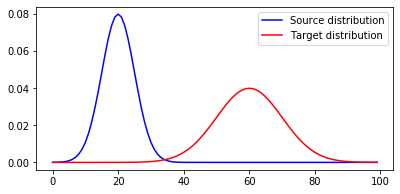

In [4]:
pl.figure(1, figsize=(6.4, 3))
pl.plot(x, a, 'b', label='Source distribution')
pl.plot(x, b, 'r', label='Target distribution')
pl.legend()

In [5]:
print(M)

[[0.00000000e+00 1.02030405e-04 4.08121620e-04 ... 9.60004081e-01
  9.79900010e-01 1.00000000e+00]
 [1.02030405e-04 0.00000000e+00 1.02030405e-04 ... 9.40312213e-01
  9.60004081e-01 9.79900010e-01]
 [4.08121620e-04 1.02030405e-04 0.00000000e+00 ... 9.20824406e-01
  9.40312213e-01 9.60004081e-01]
 ...
 [9.60004081e-01 9.40312213e-01 9.20824406e-01 ... 0.00000000e+00
  1.02030405e-04 4.08121620e-04]
 [9.79900010e-01 9.60004081e-01 9.40312213e-01 ... 1.02030405e-04
  0.00000000e+00 1.02030405e-04]
 [1.00000000e+00 9.79900010e-01 9.60004081e-01 ... 4.08121620e-04
  1.02030405e-04 0.00000000e+00]]


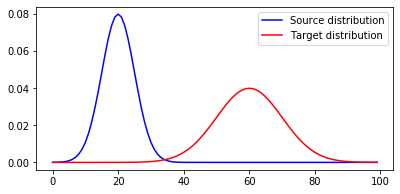

In [6]:
pl.figure(1, figsize=(6.4, 3))
pl.plot(x, a, 'b', label='Source distribution')
pl.plot(x, b, 'r', label='Target distribution')
pl.legend()

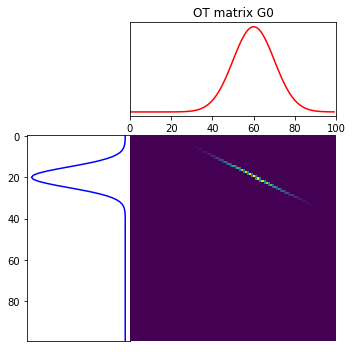

In [7]:
G0 = ot.emd(a, b, M)

pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, G0, 'OT matrix G0')

In [8]:
print(G0.shape)

(100, 100)


In [9]:
n = 50  # nb samples

mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([4, 4])
cov_t = np.array([[1, -.8], [-.8, 1]])

xs = ot.datasets.make_2D_samples_gauss(n, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(n, mu_t, cov_t)

a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

# loss matrix
M = ot.dist(xs, xt)
M /= M.max()

Text(0.5, 1.0, 'Cost matrix M')

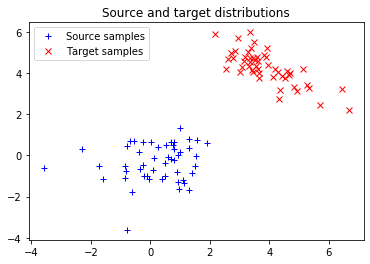

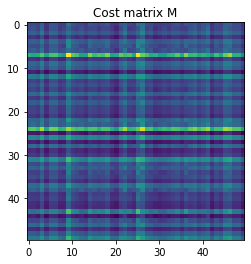

In [10]:
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('Source and target distributions')

pl.figure(2)
pl.imshow(M, interpolation='nearest')
pl.title('Cost matrix M')

Text(0.5, 1.0, 'OT matrix with samples')

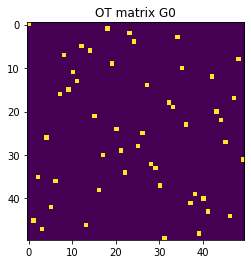

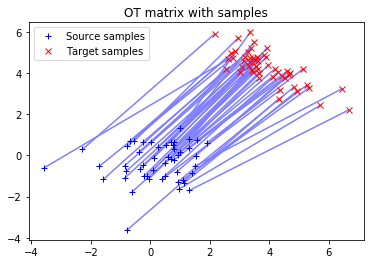

In [11]:
G0 = ot.emd(a, b, M)

pl.figure(3)
pl.imshow(G0, interpolation='nearest')
pl.title('OT matrix G0')

pl.figure(4)
ot.plot.plot2D_samples_mat(xs, xt, G0, c=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('OT matrix with samples')

In [12]:
n= 100
n_target = 50  # nb target distributions


# bin positions
x = np.arange(n, dtype=np.float64)

lst_m = np.linspace(20, 90, n_target)

# Gaussian distributions
a = gauss(n, m=20, s=5)  # m= mean, s= std

B = np.zeros((n, n_target))

for i, m in enumerate(lst_m):
    print(i,m)
    B[:, i] = gauss(n, m=m, s=5)

0 20.0
1 21.428571428571427
2 22.857142857142858
3 24.285714285714285
4 25.714285714285715
5 27.142857142857142
6 28.57142857142857
7 30.0
8 31.42857142857143
9 32.85714285714286
10 34.285714285714285
11 35.714285714285715
12 37.14285714285714
13 38.57142857142857
14 40.0
15 41.42857142857143
16 42.85714285714286
17 44.285714285714285
18 45.714285714285715
19 47.14285714285714
20 48.57142857142857
21 50.0
22 51.42857142857143
23 52.85714285714286
24 54.285714285714285
25 55.714285714285715
26 57.142857142857146
27 58.57142857142857
28 60.0
29 61.42857142857143
30 62.85714285714286
31 64.28571428571428
32 65.71428571428572
33 67.14285714285714
34 68.57142857142857
35 70.0
36 71.42857142857143
37 72.85714285714286
38 74.28571428571428
39 75.71428571428572
40 77.14285714285714
41 78.57142857142857
42 80.0
43 81.42857142857143
44 82.85714285714286
45 84.28571428571429
46 85.71428571428572
47 87.14285714285714
48 88.57142857142857
49 90.0


In [35]:
N = 3
d = 2
measures_locations = []
measures_weights = []

for i in range(N):

    n_i = np.random.randint(low=1, high=20)  # nb samples

    mu_i = np.random.normal(0., 4., (d,))  # Gaussian mean

    A_i = np.random.rand(d, d)
    cov_i = np.dot(A_i, A_i.transpose())  # Gaussian covariance matrix

    x_i = ot.datasets.make_2D_samples_gauss(n_i, mu_i, cov_i)  # Dirac locations
    b_i = np.random.uniform(0., 1., (n_i,))
    b_i = b_i / np.sum(b_i)  # Dirac weights

    measures_locations.append(x_i)
    measures_weights.append(b_i)
print(np.sum(measures_weights[2]))

1.0


In [49]:
print(measures_locations)
print(type(measures_locations[0][0]))

[array([[-7.69872628,  1.17322469],
       [-6.83966174,  1.71399892],
       [-5.80266947,  2.37122576]]), array([[ 3.30842401,  0.08244584],
       [ 3.24894855, -0.71500136],
       [ 3.2000801 , -2.13717299],
       [ 3.33777644,  1.40640031],
       [ 3.25548545, -0.72792301],
       [ 3.15424165, -2.75333955],
       [ 3.19317846, -2.14224113],
       [ 3.27274193, -0.38860209],
       [ 3.23951903, -0.81566745],
       [ 3.23799135, -0.61101561],
       [ 3.18879106, -2.26137083],
       [ 3.22689774, -0.89819367],
       [ 3.20781184, -2.0351088 ]]), array([[7.46023964, 0.15446741],
       [7.64734157, 0.66387164],
       [7.77957418, 1.02902005]])]
<class 'numpy.ndarray'>


In [14]:
k = 10  # number of Diracs of the barycenter
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations
b = np.ones((k,)) / k  # weights of the barycenter (it will not be optimized, only the locations are optimized)

X = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, b)

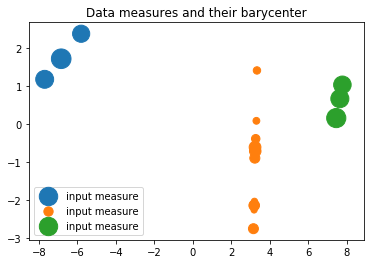

In [41]:
pl.figure(1)
for (x_i, b_i) in zip(measures_locations, measures_weights):
    #color = np.random.randint(low=1, high=10 * N)
    pl.scatter(x_i[:, 0], x_i[:, 1], s=b_i * 1000, label='input measure')

pl.title('Data measures and their barycenter')
pl.legend(loc=0)
pl.show()

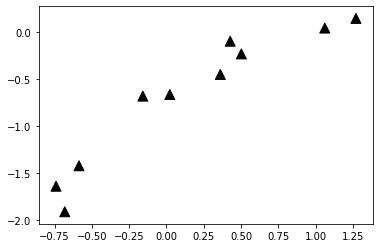

In [39]:
pl.figure(2)
pl.scatter(X[:, 0], X[:, 1], s=b * 1000, c='black', marker='^', label='2-Wasserstein barycenter')
pl.show()